In [84]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [85]:
clinical_csvpath = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_csvpath = os.path.join('raw_data', 'mouse_drug_data.csv')
clinical_data = pd.read_csv(clinical_csvpath)
mouse_data = pd.read_csv(mouse_csvpath)
#clinical_data.head()

In [86]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [87]:
# grouping mouse data by drug, and then counting the number of mice (Mouse ID) per drug.  Shows as 25 mice per drug.
mouse_data.groupby('Drug').count()

,Mouse ID
Drug,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,25


In [88]:
# Merging clinical and mouse data on 'Mouse ID', creating one merged data frame to modify throughout calling it 'Merged_data'
merged_data = pd.merge(clinical_data, mouse_data, on=['Mouse ID'])
merged_data = merged_data.set_index(['Drug'])

# Grouping merged_data by drug/timepoint, then counting the number of 'mouse id' per timepoint.
# Rename 'mouse id' to 'number alive'
mouse_death = merged_data.groupby(['Drug', 'Timepoint']).count()
mouse_death = mouse_death[['Mouse ID']].rename(columns={'Mouse ID':'Number Alive'})
mouse_death.head()


Number Alive
Drug      Timepoint              
Capomulin 0                    25
          5                    25
          10                   25
          15                   24
          20                   23

In [89]:
### Thought about creating a separate dataframe for control group in order to find the growth inhibition rates
### Turns out, don't really need to do that, I can just call .loc on merged_data dataframe

control_data = merged_data.loc['Placebo']
control_data = control_data.groupby(['Drug','Timepoint']).mean()
#control_data


In [90]:
#len(infubinol_data)
#len(infubinol_data.loc['Infubinol', 'a203'])
### for index, row in infubinol_data.iterrows();
infubinol_data = merged_data.loc['Infubinol'].groupby(['Drug', 'Mouse ID', 'Timepoint']).sum()
#infubinol_data.head()

In [57]:
# Creating a new dataframe, from merged data, this time it adds two new columns calculating the percent difference from the
# control data.  The control data (placebo) would be the reference for all the drugs, with negative values signalling
# greater growth than the placebo

new_merged_data = merged_data.groupby(['Drug', 'Timepoint']).mean()
new_merged_data['Growth Inhibition'] = 1 - (new_merged_data['Tumor Volume (mm3)']/new_merged_data.loc['Placebo', 'Tumor Volume (mm3)'])

### alternatively:
### new_merged_data['Growth Inhibition'] = 1 - (new_merged_data['Tumor Volume (mm3)']/control_data.loc['Placebo', 'Tumor Volume (mm3)'])
### new_merged_data['Metastic Inhibition'] = 1 - (new_merged_data['Metastatic Sites']/control_data.loc['Placebo', 'Metastatic Sites'])

new_merged_data['Metastic Inhibition'] = 1 - (new_merged_data['Metastatic Sites']/new_merged_data.loc['Placebo', 'Metastatic Sites'])
new_merged_data = new_merged_data.fillna(0)
new_merged_data

Tumor Volume (mm3)  Metastatic Sites  Growth Inhibition  \
Drug      Timepoint                                                            
Capomulin 0                   45.000000          0.000000           0.000000   
          5                   44.266086          0.160000           0.060678   
          10                  43.084291          0.320000           0.128260   
          15                  42.064317          0.375000           0.180987   
          20                  40.716325          0.652174           0.251048   
          25                  39.939528          0.818182           0.305189   
          30                  38.769339          1.090909           0.351782   
          35                  37.816839          1.181818           0.394161   
          40                  36.958001          1.380952           0.431876   
          45                  36.236114          1.476190           0.467774   
Ceftamin  0                   45.000000          0.000000           0.000000   
          5                   46.503051          0.380952           0.013210   
          10                  48.285125          0.600000           0.023030   
          15                  50.094055          0.789474           0.024644   
          20                  52.157049          1.111111           0.040603   
          25                  54.287674          1.500000           0.055580   
          30                  56.769517          1.937500           0.050821   
          35                  58.827548          2.071429           0.057562   
          40                  61.467895          2.357143           0.055106   
          45                  64.132421          2.692308           0.058041   
Infubinol 0                   45.000000          0.000000           0.000000   
          5                   47.062001          0.280000           0.001349   
          10                  49.403909          0.666667           0.000393   
          15                  51.296397          0.904762           0.001233   
          20                  53.197691          1.050000           0.021461   
          25                  55.715252          1.277778           0.030745   
          30                  58.299397          1.588235           0.025241   
          35                  60.742461          1.666667           0.026885   
          40                  63.162824          2.100000           0.029051   
          45                  65.755562          2.111111           0.034201   
Ketapril  0                   45.000000          0.000000           0.000000   
          5                   47.389175          0.304348          -0.005593   
          10                  49.582269          0.590909          -0.003216   
          15                  52.399974          0.842105          -0.020254   
          20                  54.920935          1.210526          -0.010237   
          25                  57.678982          1.631579          -0.003417   
          30                  60.994507          2.055556          -0.019820   
          35                  63.371686          2.294118          -0.015236   
          40                  66.068580          2.733333          -0.015617   
          45                  70.662958          3.363636          -0.037878   
Naftisol  0                   45.000000          0.000000           0.000000   
          5                   46.796098          0.260870           0.006992   
          10                  48.694210          0.523810           0.014753   
          15                  50.933018          0.857143           0.008309   
          20                  53.644087          1.150000           0.013250   
          25                  56.731968          1.500000           0.013058   
          30                  59.559509          2.066667           0.004173   
          35                  62.685087          2.266667          -0.004237   
          40         

In [63]:
# Separating tumor data from metastatic data into a separate dataframe for plotting only tumor size.

tumor_data = new_merged_data[['Tumor Volume (mm3)']]
#tumor_data.head()

In [64]:
capo_data = tumor_data.loc['Capomulin']
capo_data = capo_data.rename(columns={'Tumor Volume (mm3)': 'Capomulin'})
capo_data = capo_data.reset_index()

In [65]:
placebo_data = tumor_data.loc['Placebo']
placebo_data = placebo_data.rename(columns={'Tumor Volume (mm3)': 'Placebo'})
placebo_data = placebo_data.reset_index()

In [75]:
CP_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
#CP_merge.head()

In [76]:
infubinol_data = tumor_data.loc['Infubinol']
infubinol_data = infubinol_data.rename(columns={'Tumor Volume (mm3)': 'Infubinol'})
infubinol_data = infubinol_data.reset_index()

In [77]:
ketapril_data = tumor_data.loc['Ketapril']
ketapril_data = ketapril_data.rename(columns={'Tumor Volume (mm3)': 'Ketapril'})
ketapril_data = ketapril_data.reset_index()

In [78]:
K_I_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
#K_I_merge.head()

In [83]:
total_merge_CPKI = pd.merge(K_I_merge, CP_merge, on='Timepoint')
#total_merge_CPKI.set_index("Timepoint").head()

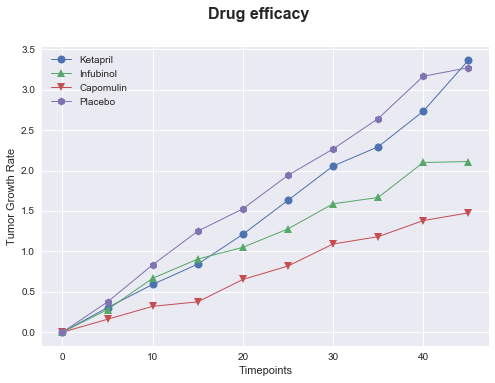

In [171]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Drug efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Tumor Growth Rate")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()

In [163]:
meta_data = new_merged_data[['Metastatic Sites']]

In [168]:
capo_data = meta_data.loc['Capomulin']
capo_data = capo_data.rename(columns={'Metastatic Sites': 'Capomulin'})
capo_data = capo_data.reset_index()
placebo_data = meta_data.loc['Placebo']
placebo_data = placebo_data.rename(columns={'Metastatic Sites': 'Placebo'})
placebo_data = placebo_data.reset_index()
CP_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
CP_merge.head()

,Timepoint,Placebo,Capomulin
0,0,0.000000,0.000000
1,5,0.375000,0.160000
2,10,0.833333,0.320000
3,15,1.250000,0.375000
4,20,1.526316,0.652174


In [169]:
infubinol_data = meta_data.loc['Infubinol']
infubinol_data = infubinol_data.rename(columns={'Metastatic Sites': 'Infubinol'})
infubinol_data = infubinol_data.reset_index()
ketapril_data = meta_data.loc['Ketapril']
ketapril_data = ketapril_data.rename(columns={'Metastatic Sites': 'Ketapril'})
ketapril_data = ketapril_data.reset_index()
K_I_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
K_I_merge.head()

,Timepoint,Infubinol,Ketapril
0,0,0.000000,0.000000
1,5,0.280000,0.304348
2,10,0.666667,0.590909
3,15,0.904762,0.842105
4,20,1.050000,1.210526


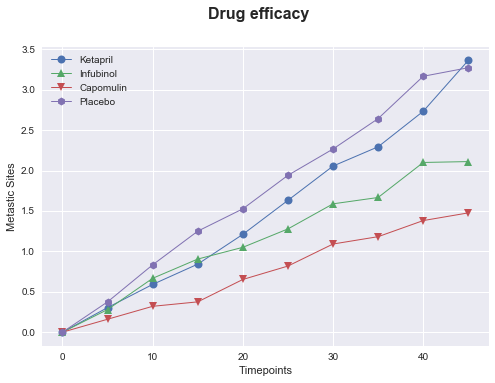

In [173]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Drug efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Metastic Sites")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()